# EDA - Exploratory Data Analysis

In this notebook we will start by Loading, Clean, and Explore the PM2.5 data of US Embassy in Beijing dataset.
Contents:
1. Loading the CSV with pandas
2. Sorting, Missing and Duplicated Values
3. Data Exploration:
    3.1. Missing Values Plot
    3.2. Count Plot
    3.3. Distribution Plot
    3.4. Pair Plot
    3.5. Correlation Plot
4. AutoViz


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from datetime import datetime

## Loading CSV with Pandas plus 1st look into the data

In [2]:
#use pandas to load and convert the CSV
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [3]:
#printing the 1st 10 lines of the dataframe
print(df.head(10))
print(df.shape)

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
5   6  2010      1    1     5    NaN   -19 -10.0  1017.0   NW  16.10   0   0
6   7  2010      1    1     6    NaN   -19  -9.0  1017.0   NW  19.23   0   0
7   8  2010      1    1     7    NaN   -19  -9.0  1017.0   NW  21.02   0   0
8   9  2010      1    1     8    NaN   -19  -9.0  1017.0   NW  24.15   0   0
9  10  2010      1    1     9    NaN   -20  -8.0  1017.0   NW  27.28   0   0
(43824, 13)


We can start by noticing that there 4 columns for date (year,month,day,hour), and 8 columns for variables.
Note that the **pm2.5** only has NaN values in the first 10 entries.



In [4]:
#drop indexing column
df = df.drop(columns=["No"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB
None


According to the dataset [source page](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data), each of the dataset columns is the following:
1. Year
2. Month
3. Day (of the month)
4. Hour
5. pm2.5: PM2.5 concentration (ug/m^3)
6. DEWP: Dew Point (ºC)
7. TEMP: Temperature (ºC)
8. PRES: Pressure (hPa)
9. cbwd: Combined Wind Direction
10. lws: Cumulated wind speed (m/s)
11. Cumulated hours of snow (hours)
12. Cumulated hours of rain (hours)

**This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.**

The dataset **starts in 01.01.2010 and ends in 31.12.2014**.

We see that all columns, except column **cbwd**, are of numeric dtype, which is what we intend.
In this notebook we will only deal with EDA, so transforming the wind direction column into a numerical column will be done in a later notebook.

## Sorting, Missing, and Duplicate Rows

Lets be sure the dataframe is sorted, there is not an issue with missing rows (days) and there are no duplicate rows.

### Sorting and Missing Values

In [5]:
#be sure the df is sorted by date
df["Datetime"] = pd.to_datetime(df["day"].astype(str) +"/" +  df["month"].astype(str) + "/" + df["year"].astype(str) +" " + df["hour"].astype(str),format="%d/%m/%Y %H")

df.insert(0, 'Datetime', df.pop('Datetime'))
df.sort_values(by=["Datetime"])

#be sure there are no days missing
null_counter = df["Datetime"].isnull().sum()
print("The number of rows with NaN Date is:",null_counter)
print(df.head())

The number of rows with NaN Date is: 0
             Datetime  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd  \
0 2010-01-01 00:00:00  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   
1 2010-01-01 01:00:00  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   
2 2010-01-01 02:00:00  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   
3 2010-01-01 03:00:00  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   
4 2010-01-01 04:00:00  2010      1    1     4    NaN   -20 -12.0  1018.0   NW   

     Iws  Is  Ir  
0   1.79   0   0  
1   4.92   0   0  
2   6.71   0   0  
3   9.84   0   0  
4  12.97   0   0  


There aren't any rows with the date missing. As a matter of fact, when we previously called ***df.info()*** we saw that only the column **pm2.5** add missing values, more precisely 43824-41757=2067 missing entries. As said before, we will deal with those missing values in a latter notebook.

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  43824 non-null  datetime64[ns]
 1   year      43824 non-null  int64         
 2   month     43824 non-null  int64         
 3   day       43824 non-null  int64         
 4   hour      43824 non-null  int64         
 5   pm2.5     41757 non-null  float64       
 6   DEWP      43824 non-null  int64         
 7   TEMP      43824 non-null  float64       
 8   PRES      43824 non-null  float64       
 9   cbwd      43824 non-null  object        
 10  Iws       43824 non-null  float64       
 11  Is        43824 non-null  int64         
 12  Ir        43824 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 4.3+ MB


### Delete duplicates

In [7]:
#delete duplicate rows
print(df.shape)
df.drop_duplicates()
print(df.shape)
#no duplicates if the output shape is the same



(43824, 13)
(43824, 13)


## Data exploration


We are now ready to explore the data: look for patterns, distributions, errors, and quirks in the data.


### Missing Values

<AxesSubplot: >

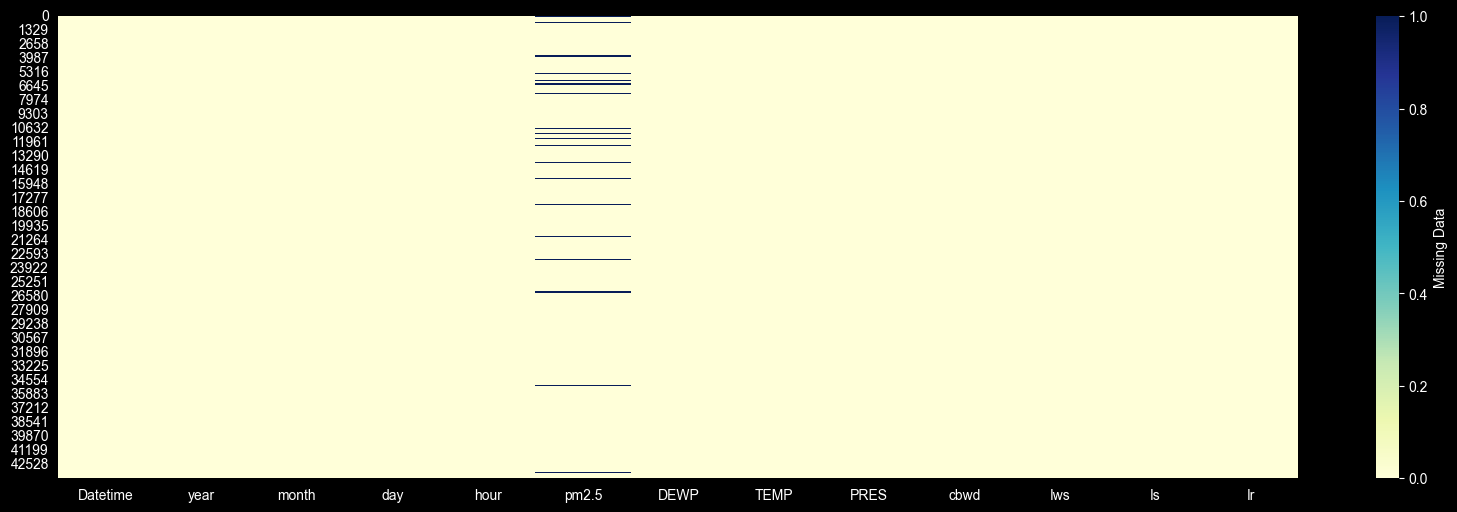

In [8]:
#Checking Missing Values
plt.figure(figsize=(20,6))
sns.heatmap(df.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

As we can see, once agin, the only missing values are in column **pm2.5**

### Checking for non-unique entries count

year        5
month      12
hour       24
Is         28
day        31
Ir         37
PRES       60
TEMP       64
DEWP       69
pm2.5     581
Iws      2788
dtype: int64


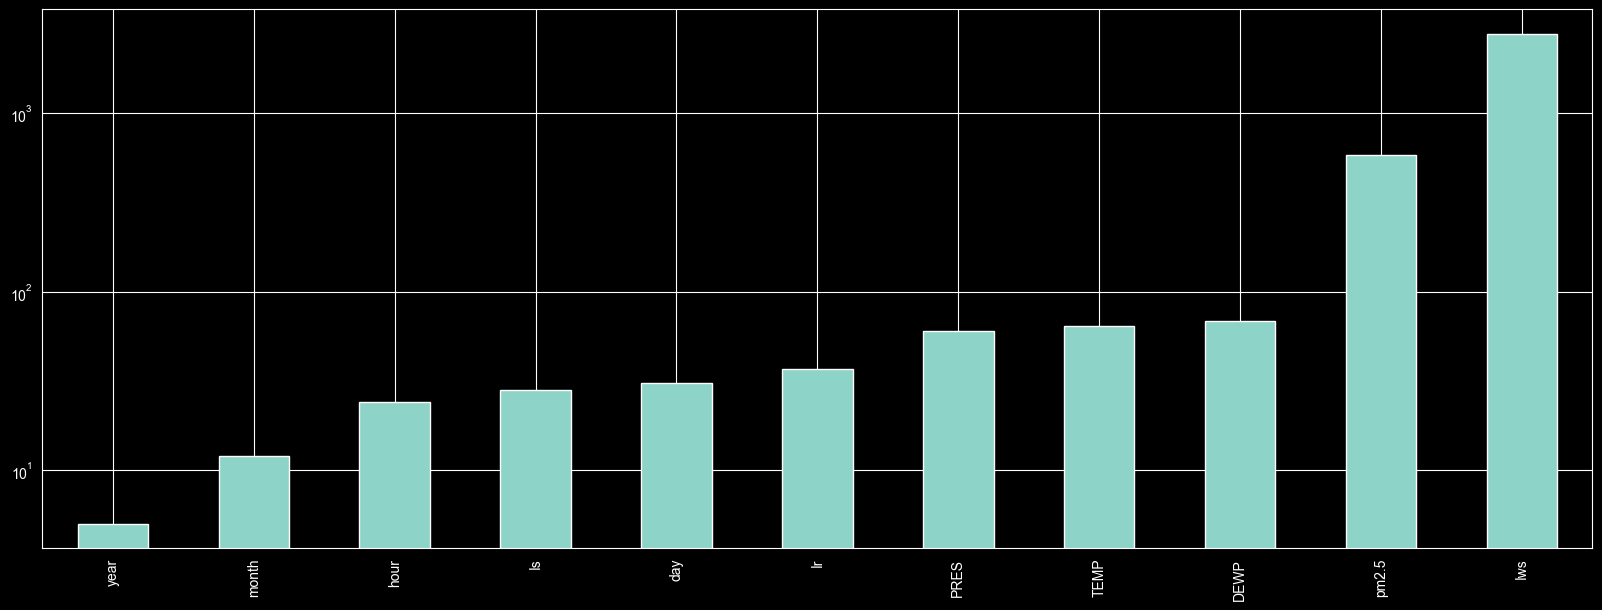

In [9]:
# how many non-unique entries does each column have?
unique_values = df.select_dtypes(include=('float',"int")).nunique().sort_values()
print(unique_values)
unique_values.plot(kind="bar",logy=True,figsize=(20,7))
plt.show()

### Variables distributions

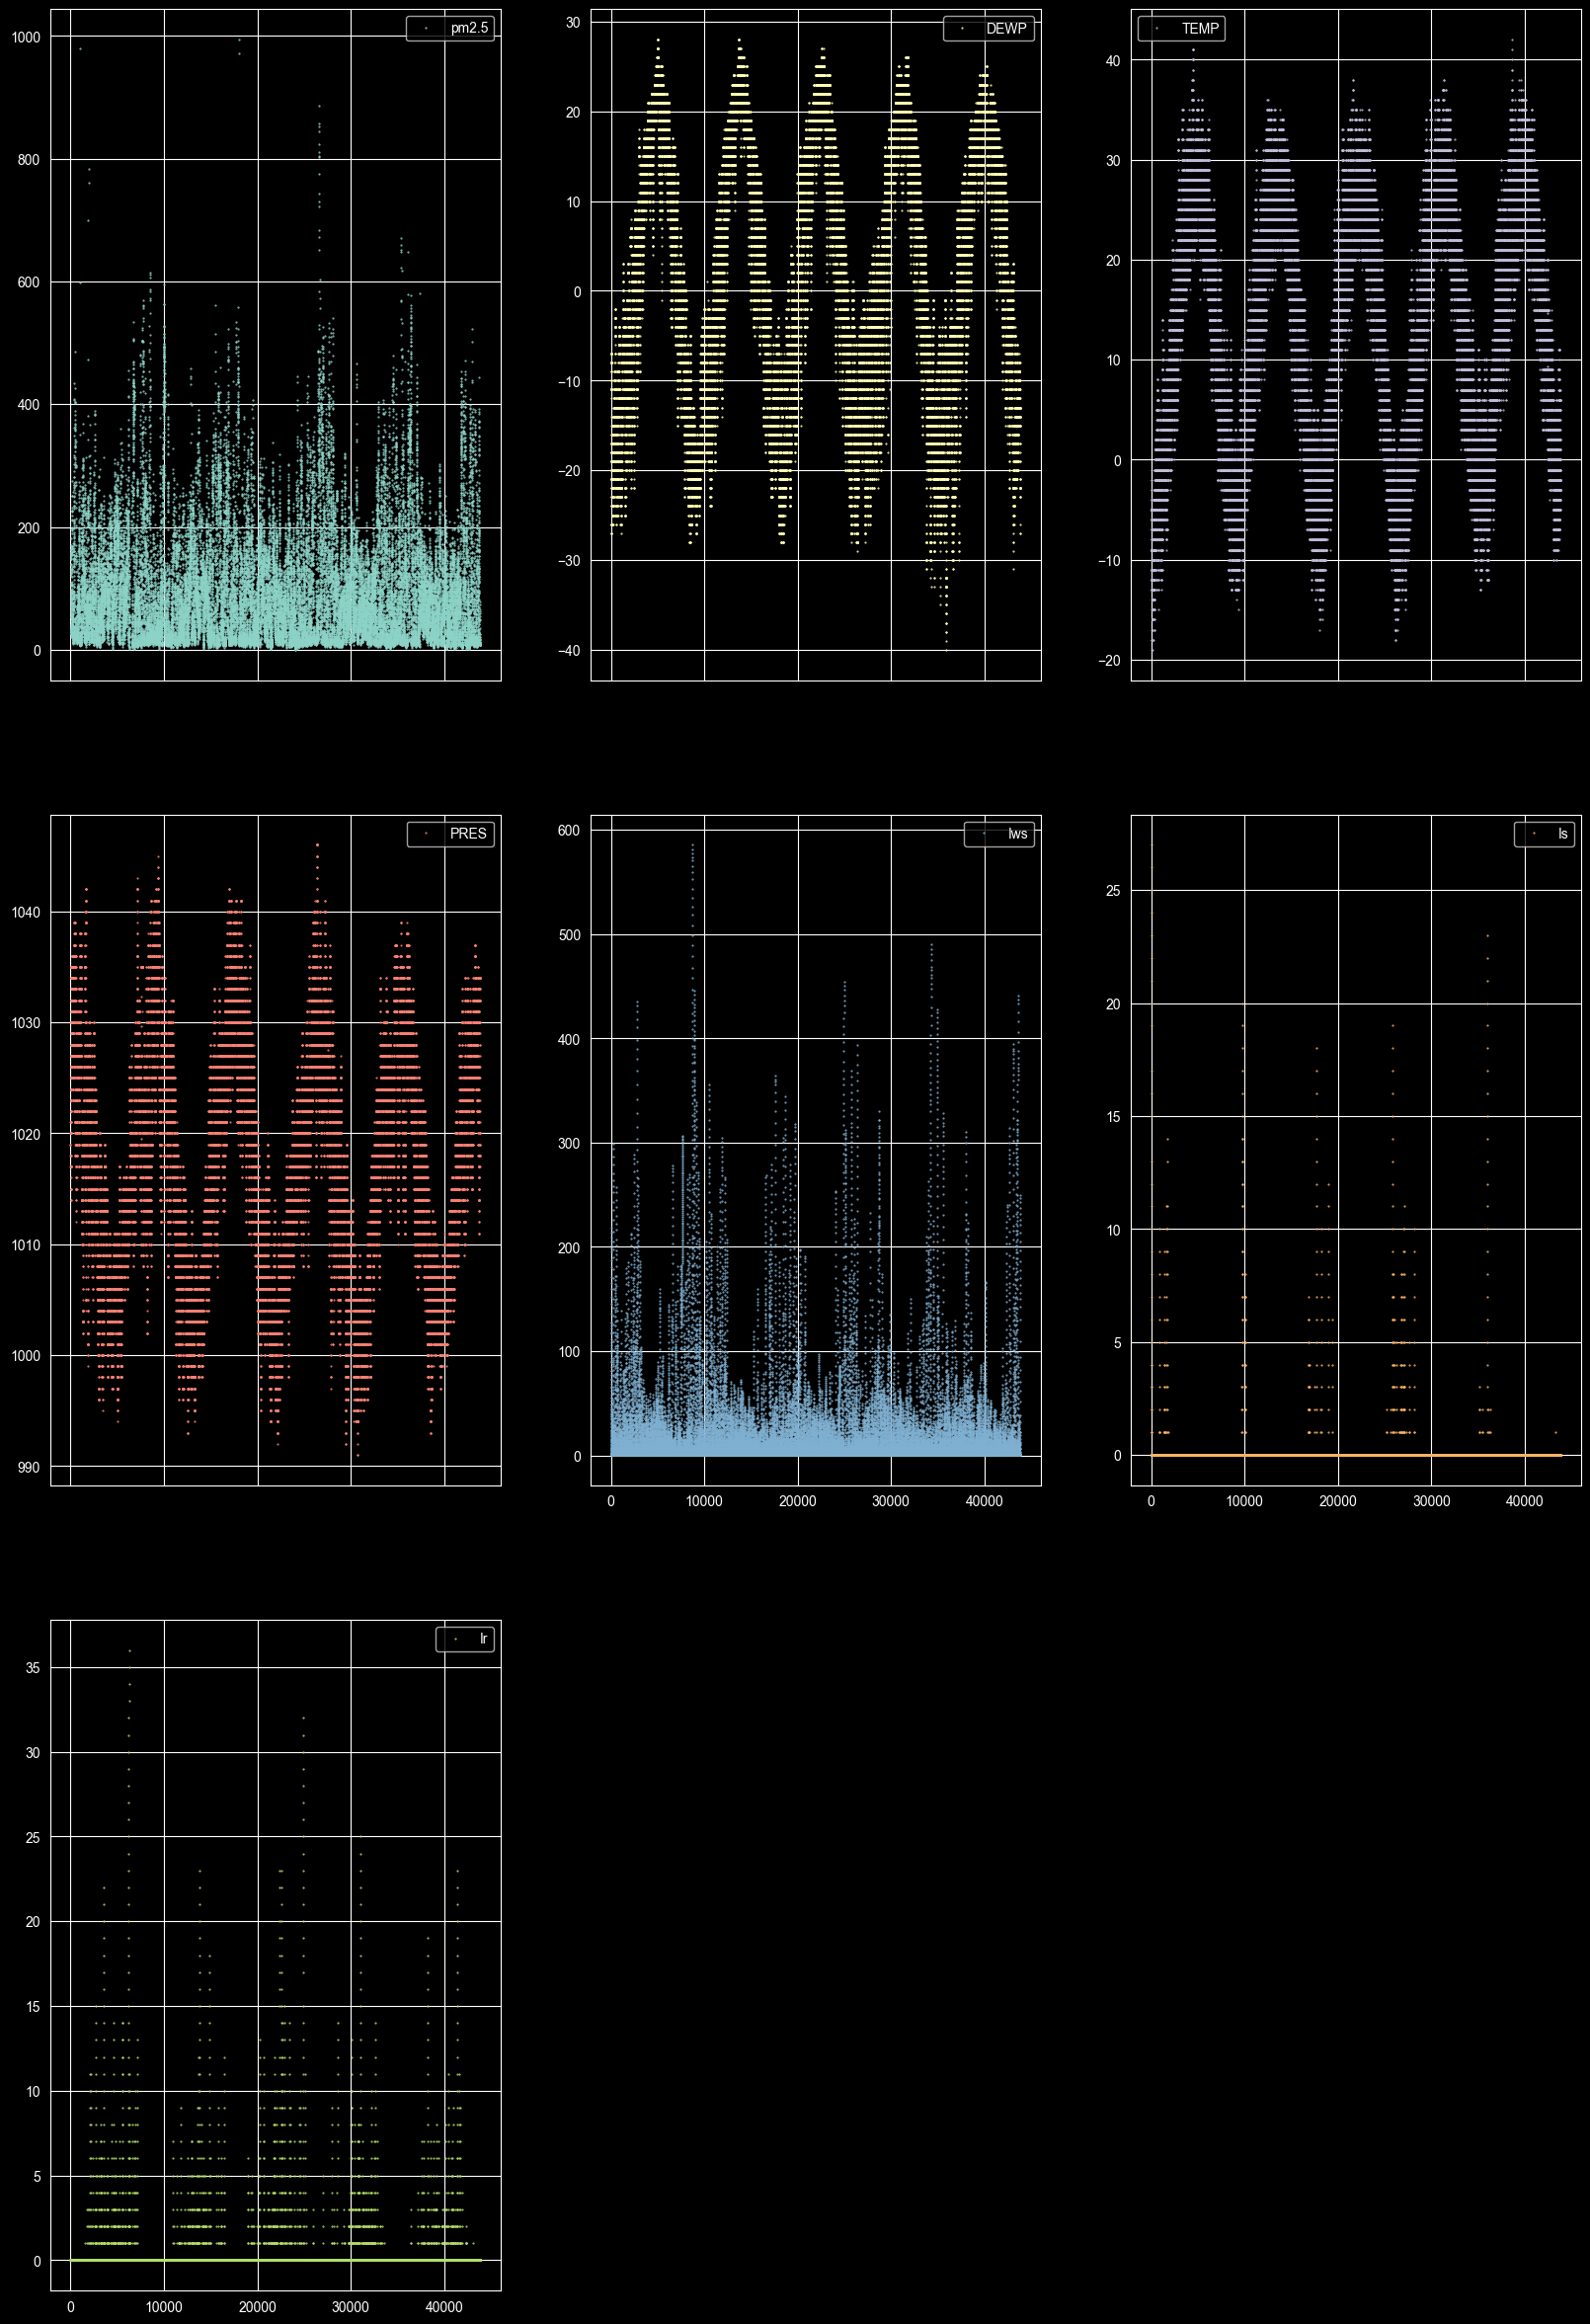

In [10]:
df.iloc[:,5:].plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(20, 30), markersize=1);


Some remarks after observing these plots:
1. There seems to be seasonality in all of the variables, which was expected.
2. Hours of snow(**ls**) and hours of rain (**lr**) at first sight seem to be wrong, but one has to think that it does not rain most of the days, and is rare to snow, in Beijing.

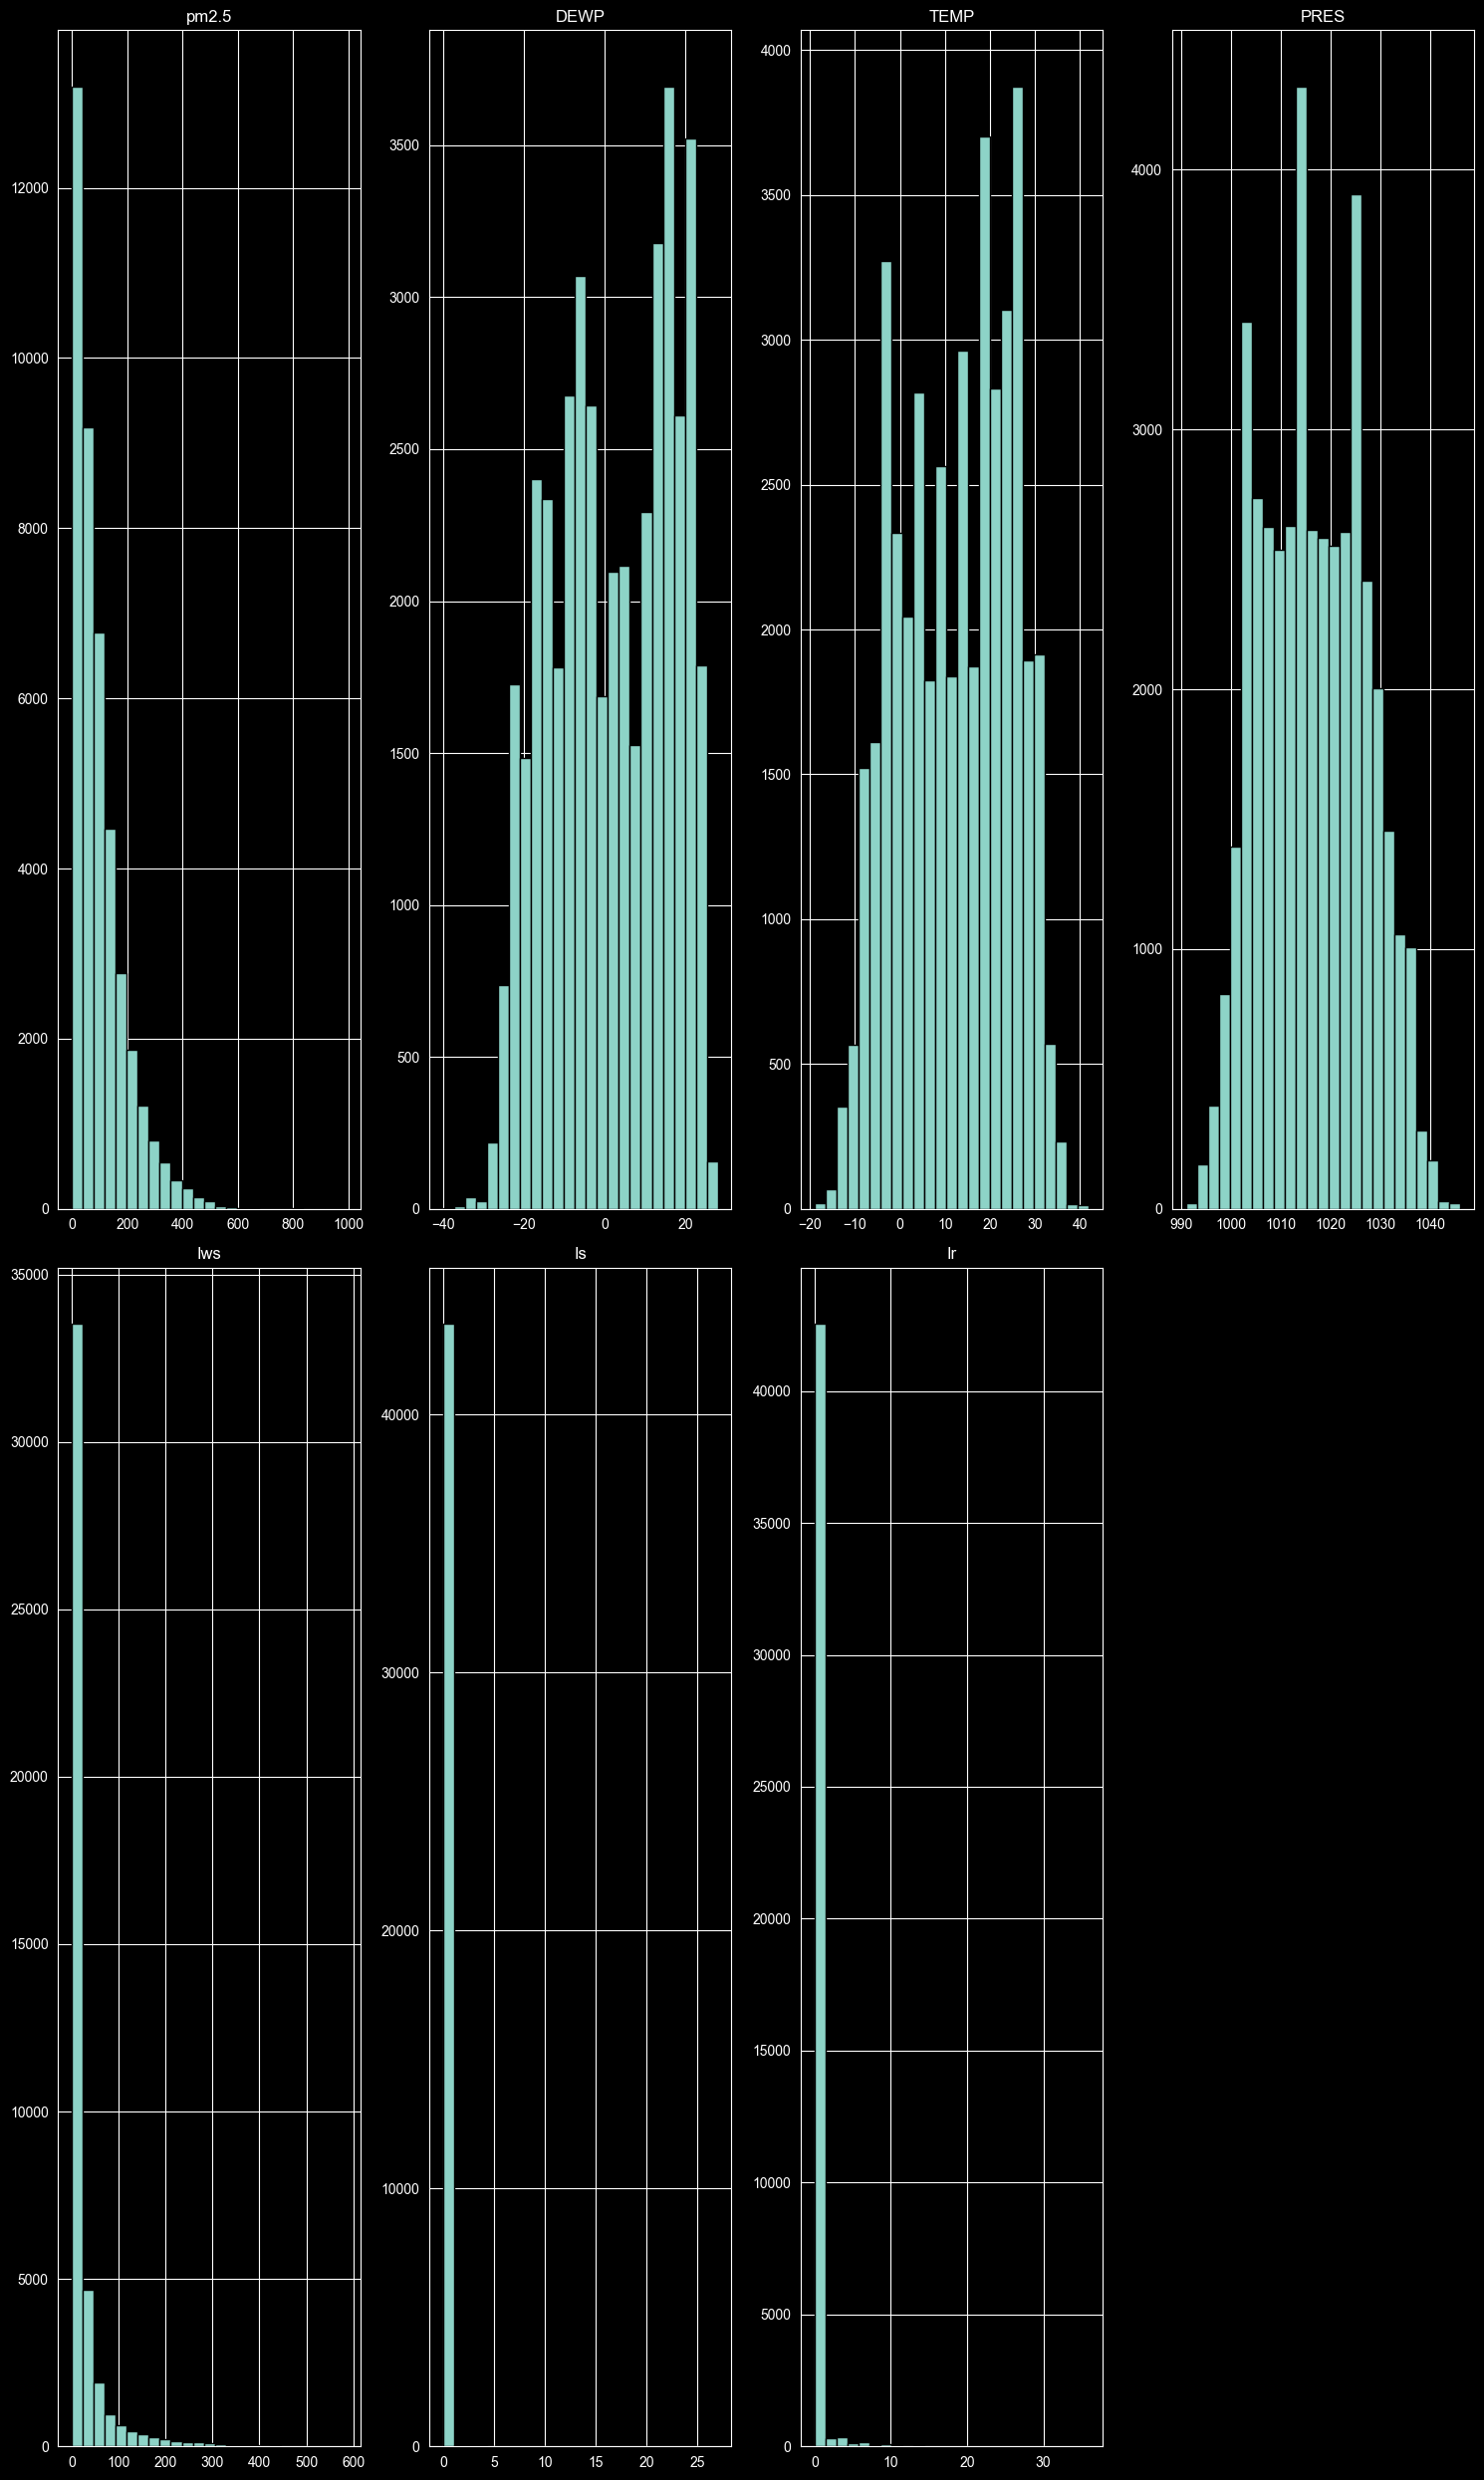

In [11]:
df.iloc[:,5:].hist(bins=25, figsize=(15, 25), layout=(-1, 4), edgecolor="black")
plt.tight_layout();

From these histograms we can remark that:
1. Once again is evident that rain(**lr**), snow (**ls**), and now also wind (**lws**) are not present in most days
2. The other weather variables (temperature,dew point, and pressure) follow normal-like distributions.
3. Surprisingly, the air quality variable (also the study variable) is dominated by days with 0 or near 0 particle density.

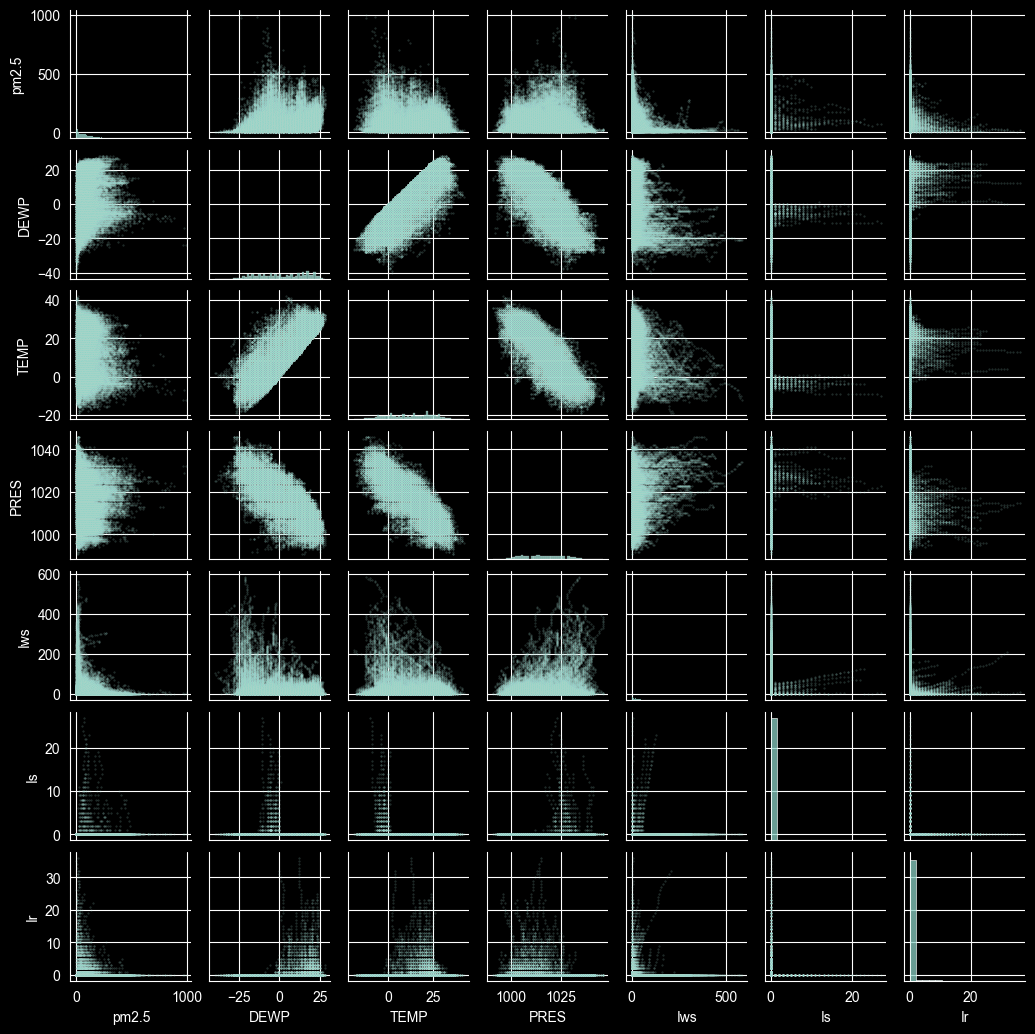

In [12]:
#check the pair plots to see if there is any evident relationship
sns.pairplot(df.iloc[:,5:], height=1.5, plot_kws={"s": 2, "alpha": 0.2});

By plotting the variables against each others, we can notice clear linearly correlations in the upper right corner. Other than that, it doesn't seem to be any other important remark to make from this group of plots.

We can further inspect the correlation between each variable by plotting a correlation matrix.

C:\Users\J. Bastos\AppData\Local\Temp\ipykernel_11796\1531566401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.iloc[:,5:].corr(method="pearson")


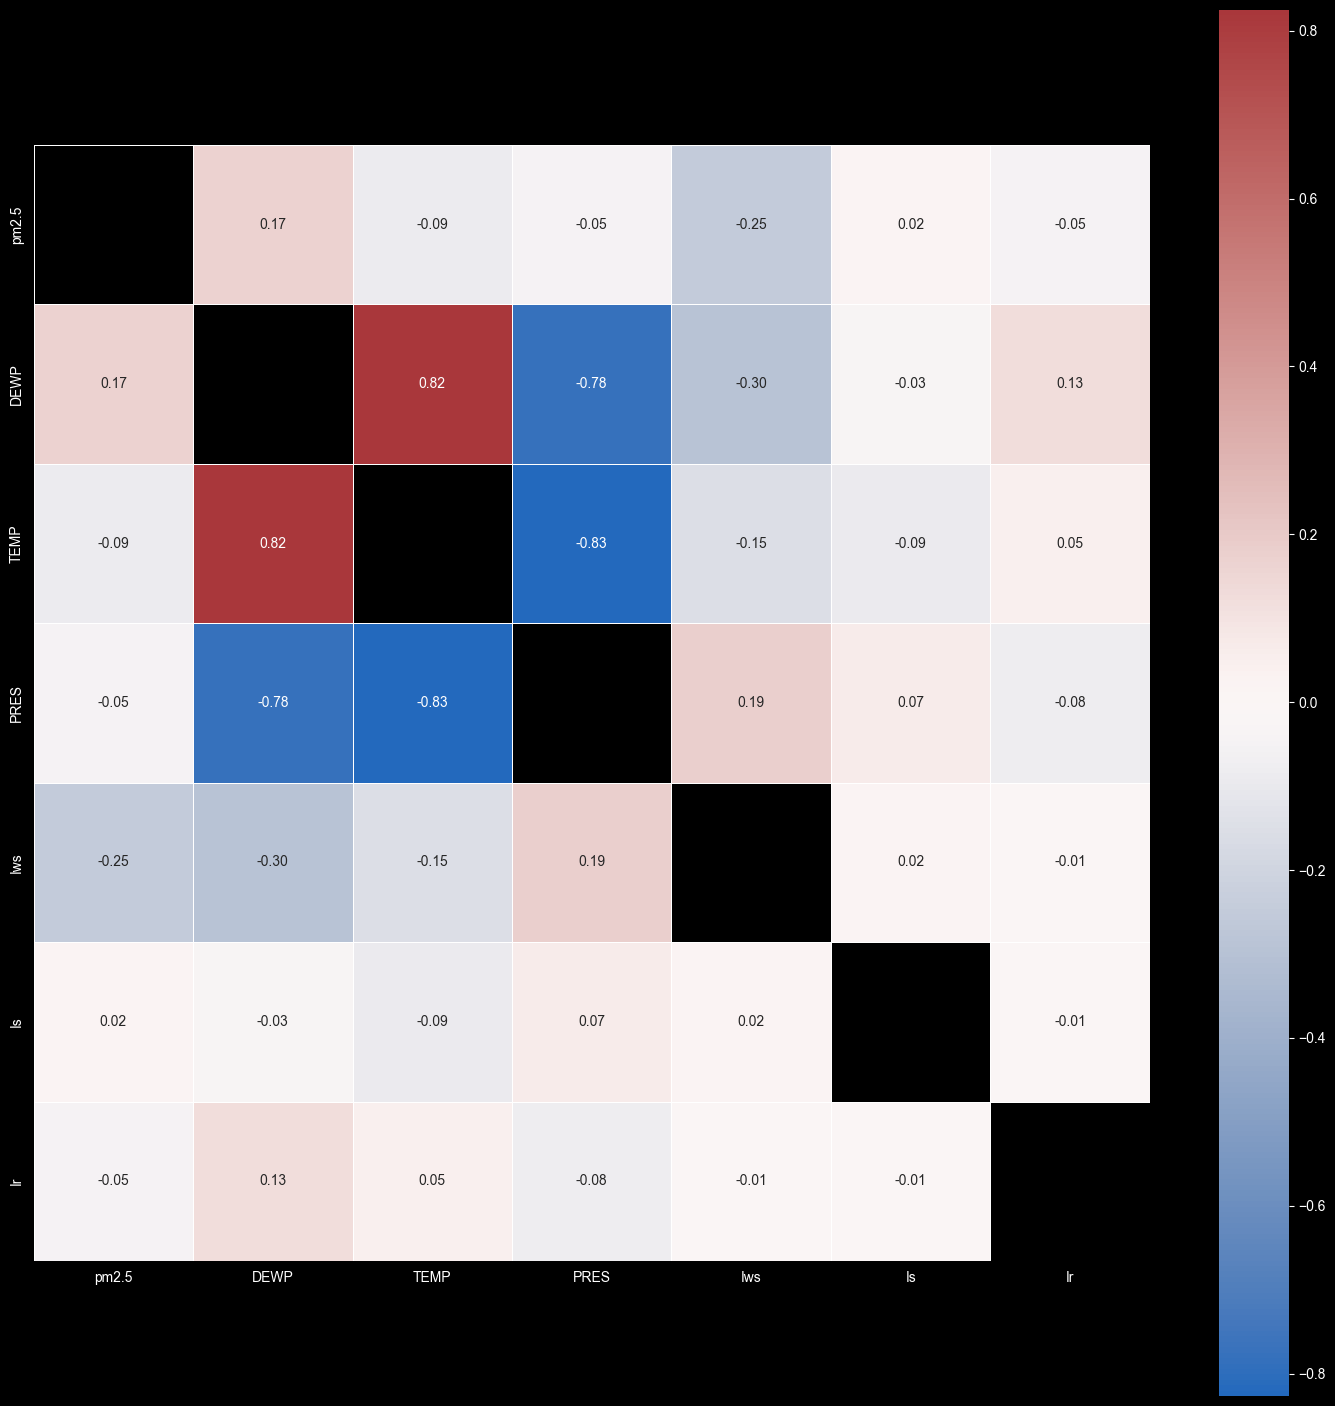

In [18]:

df_corr = df.iloc[:,5:].corr(method="pearson")

# Plot correlation matrix
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df_corr, ax=ax, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='.2f', linewidths=.5,cmap="vlag",annot=True);

Once again, it's evident the correlation between **DEWP**, **TEMP**, and **PRES**. Other than those 3 variables, all other seem lightly correlated. And our key variable, **pm2.5** doesn't seem to have a high correlation factor with any other variable.

## AutoViz - Quick and Automatic EDA

Nowadays, there are Python packages that automate EDA and make it simpler. Keeping in mind that tools like AutoViz add one level of abstraction between you and the data/code, it is a good idea eitehr to start the EDA with AutoViz or end with. This way you can etiher get good ideas/points for your EDA or confirm your ideas or even show you things you missed. Either way, AutoViz makes clean plots instantly.

In [20]:
from autoviz.AutoViz_Class import AutoViz_Class

#you can get a fast EDA with just 2 lines of code!
AV = AutoViz_Class()
dft = AV.AutoViz(filename="",dfte=df,chart_format="server",verbose=1) #verbose=2 saves plots in the same directory as the notebook under /AutoViz Folder, verbose=1 prints plots in notebook #although in Pycharm it was not working


Shape of your Data Set loaded: (43824, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Datetime,43824,datetime64[ns],0,0.000000,100.000000,0,possible ID column: drop
Iws,2788,float64,0,0.000000,6.361811,0,skewed: cap or drop outliers
pm2.5,581,float64,2067,4.716594,1.325758,0,"fill missing, skewed: cap or drop outliers"
DEWP,69,int64,0,0.000000,0.157448,0,
TEMP,64,float64,0,0.000000,0.146039,0,
PRES,60,float64,0,0.000000,0.136911,0,
Ir,37,int64,0,0.000000,0.084429,0,
day,31,int64,0,0.000000,0.070737,0,
Is,28,int64,0,0.000000,0.063892,0,
hour,24,int64,0,0.000000,0.054765,0,


    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No scatter plots with depVar when no depVar is given.
pair_scatters can be found in URL below:
Launching server at http://localhost:54483
distplots can be found in URL below:
Launching server at http://localhost:54484
violinplots can be found in URL below:
Launching server at http://localhost:54485
heatmaps can be found in URL below:
Launching server at http://localhost:54486
timeseries_plots can be found in URL below:
Launching server at http://localhost:54487
cat_var_plots can be found in URL below:
Launching server at http://localhost:54488
Time to run AutoViz (in seconds) = 2


Here are some examples of the output from AutoViz:

### Bar Plots

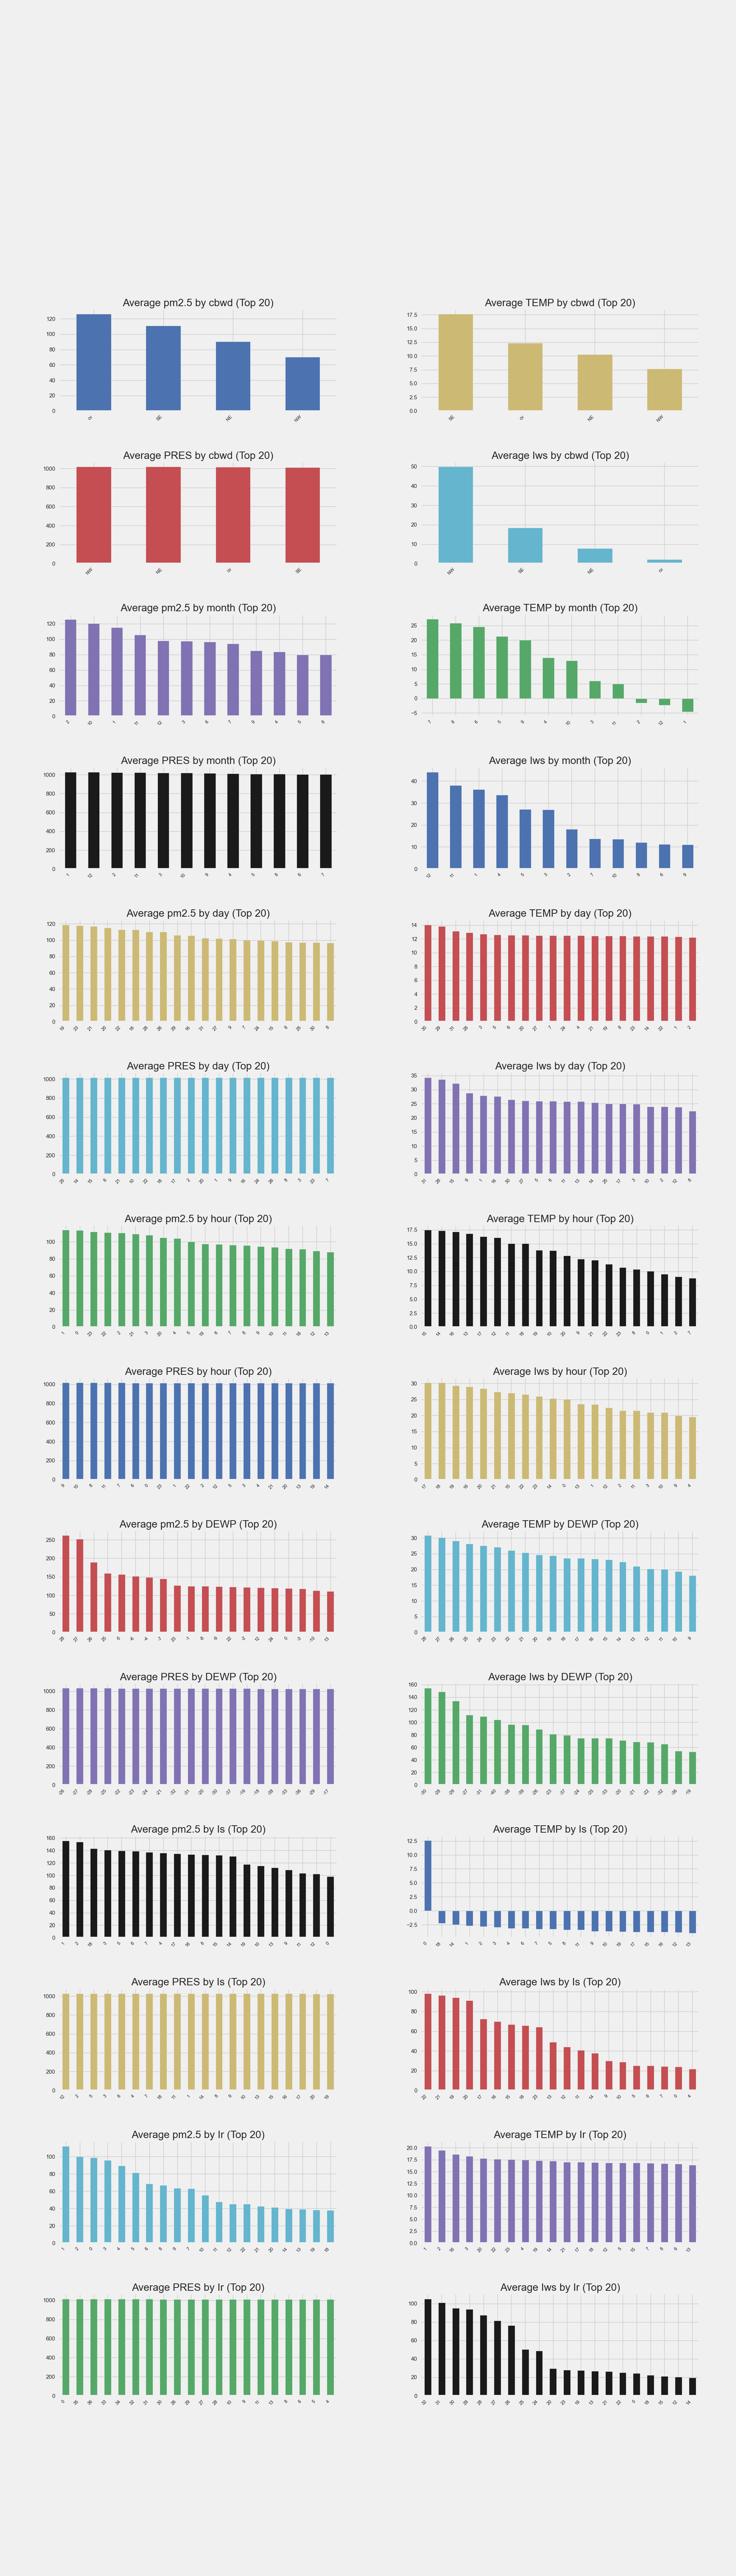

In [26]:
from IPython.display import Image
PATH = "AutoViz_Plots/AutoViz/Bar_Plots.png"
Image(filename = PATH, width=100, height=100)

### Distribution Plots

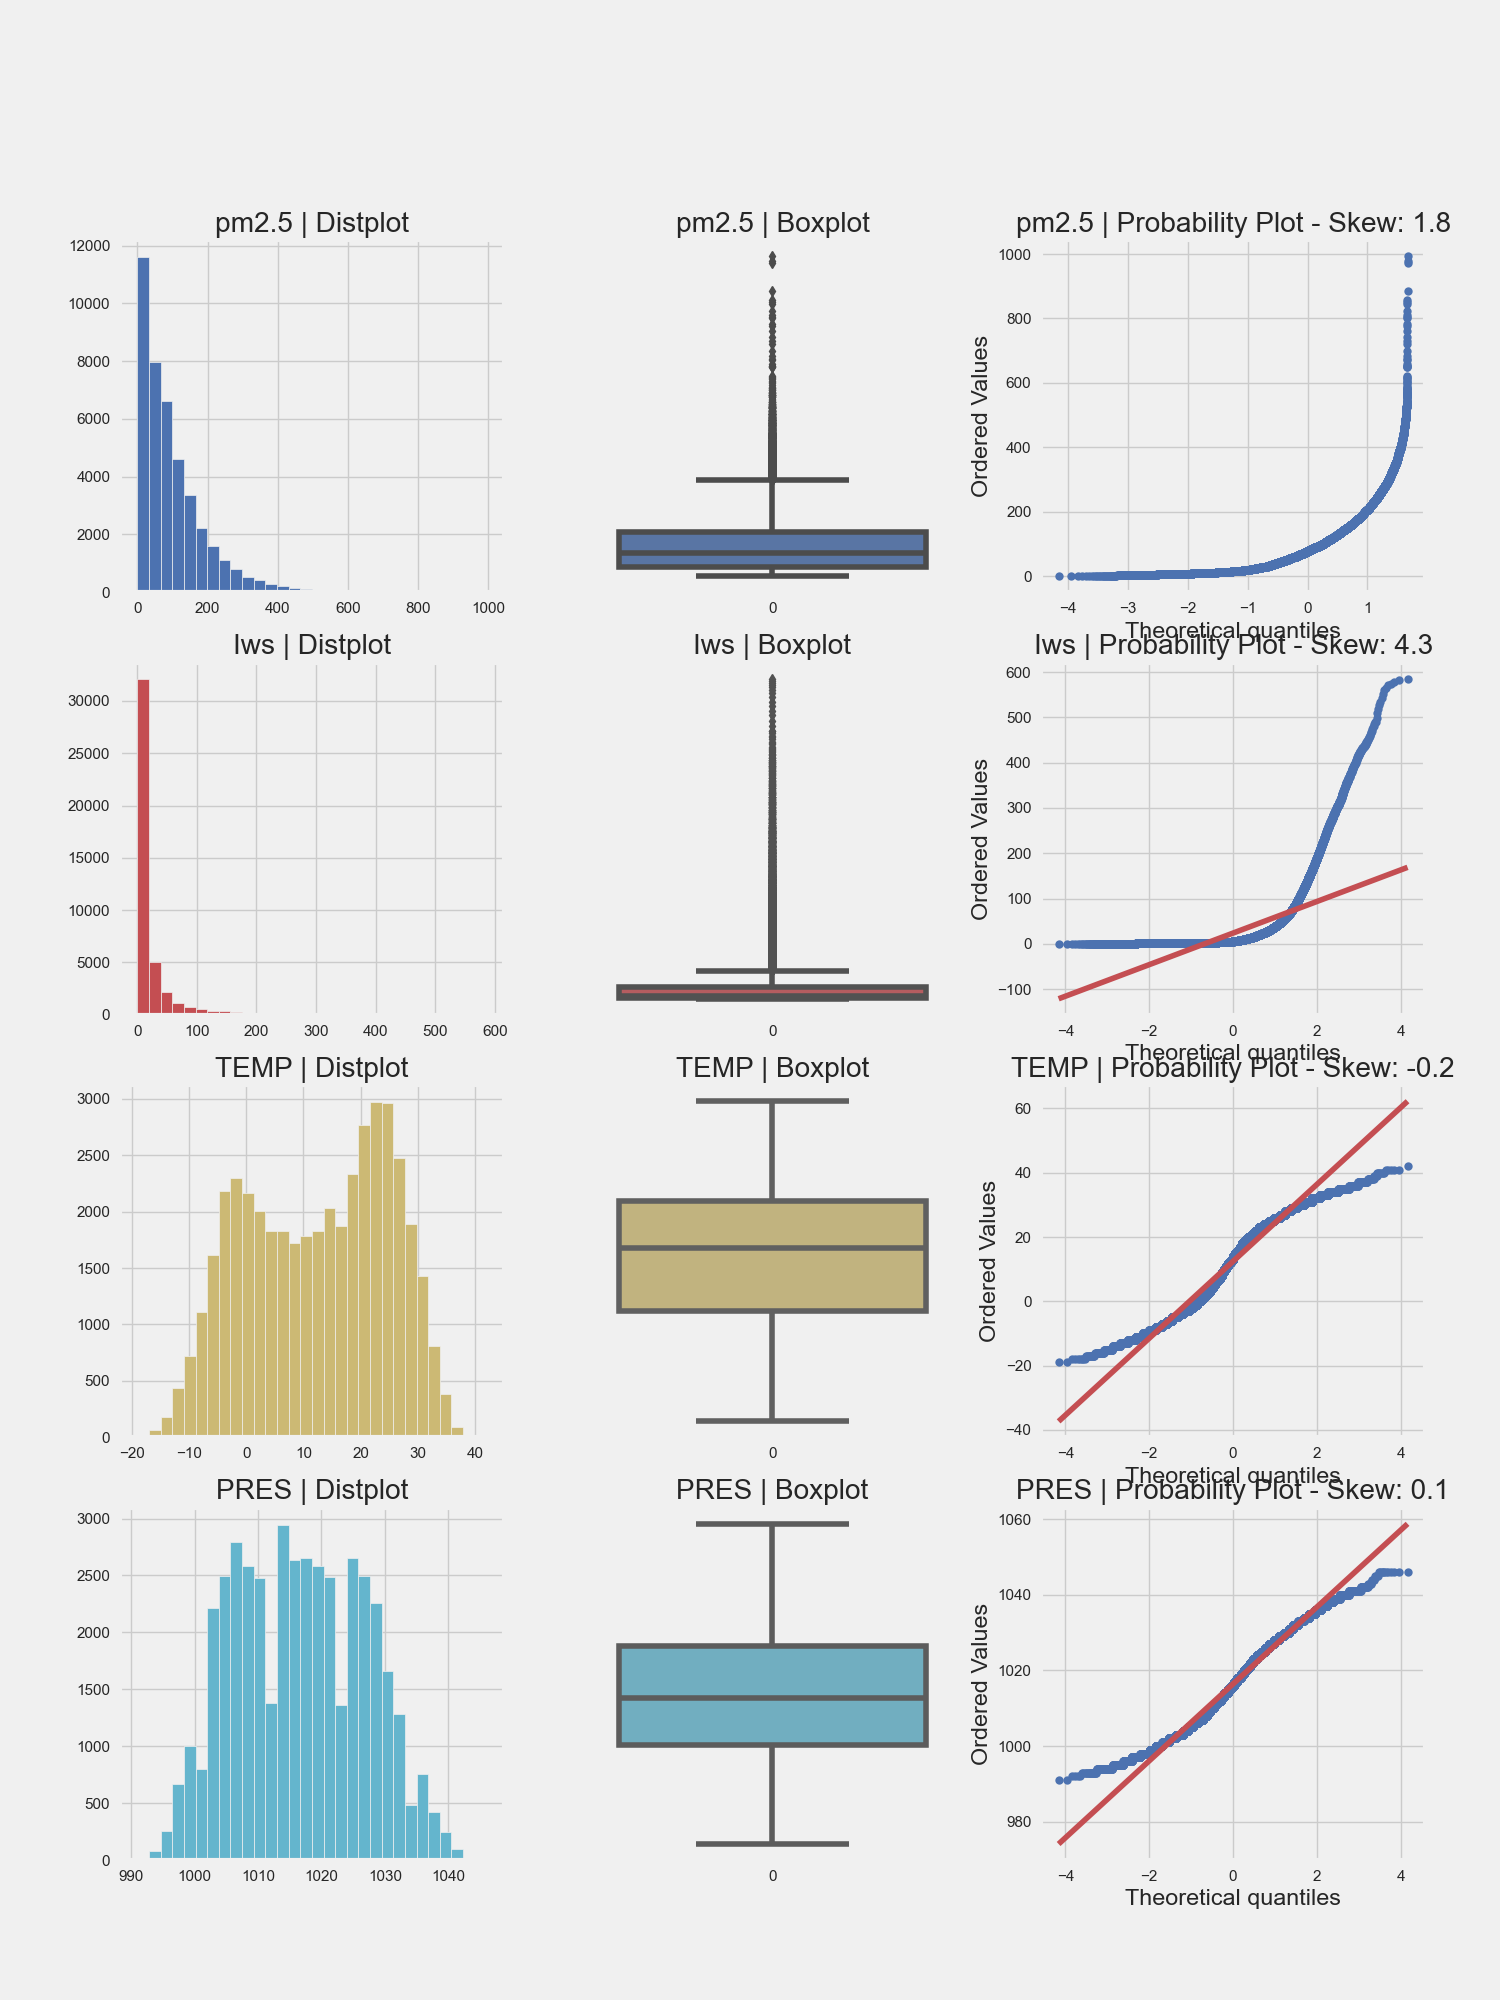

In [27]:
PATH = "AutoViz_Plots/AutoViz/Dist_Plots_Numeric.png"
Image(filename = PATH, width=100, height=100)